# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [36]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [38]:

# #power
addressGev_ndgp="./../nDGP_evolution/output/";
address_screen="./../nDGP_evolution_screened/output/";
addressGev_lcdm="./../GR_LCDM/output/"
address_screen_smooth_r0="./../nDGP_evolution_screened_smoothed/output/r0";
address_screen_smooth_r1="./../nDGP_evolution_screened_smoothed/output/r1";
address_screen_smooth_r2="./../nDGP_evolution_screened_smoothed/output/r2";
address_screen_smooth_r5="./../nDGP_evolution_screened_smoothed/output/r5";




# addressGev_ndgp_screen="Results_nDGP_screened";
# addressGev_ndgp="./Results_nDGP"
# addressGev_lcdm="Results_LCDM"

pow_GR_delta_z_all=[]
pow_ndgp_delta_z_all=[]
pow_ndgp_screen_delta_z_all=[]
pow_ndgp_smooth_delta_z_all_r0=[]
pow_ndgp_smooth_delta_z_all_r1=[]
pow_ndgp_smooth_delta_z_all_r2=[]
pow_ndgp_smooth_delta_z_all_r5=[]


# test_dg_g_z_all=[]
# pow_ndgp_screen_phi_z_all=[]
# Bg_ndgp=np.loadtxt("./"+addressGev_ndgp+"/ndgp_background.dat")
# Bg_ndgp_screen =np.loadtxt("./"+addressGev_ndgp_screen+"/ndgp_screen_background.dat")

z_list=[100,50, 30, 10, 3, 1, 0]
maxNum=np.shape(z_list)[0]
for i in range (0,maxNum):
    pow_ndgp_delta_z_all.append(np.loadtxt(addressGev_ndgp+"/ndgp_pk"+str(i).zfill(3)+"_delta.dat"))
    pow_ndgp_screen_delta_z_all.append(np.loadtxt(address_screen+"/ndgp_pk"+str(i).zfill(3)+"_delta.dat"))
    pow_GR_delta_z_all.append(np.loadtxt(addressGev_lcdm+"lcdm_newt_pk"+str(i).zfill(3)+"_delta.dat"))

    pow_ndgp_smooth_delta_z_all_r0.append(np.loadtxt(address_screen_smooth_r0+"/ndgp_pk_smooth"+str(i).zfill(3)+"_delta.dat"))
    pow_ndgp_smooth_delta_z_all_r1.append(np.loadtxt(address_screen_smooth_r1+"/ndgp_pk_smooth"+str(i).zfill(3)+"_delta.dat"))
    pow_ndgp_smooth_delta_z_all_r2.append(np.loadtxt(address_screen_smooth_r2+"/ndgp_pk_smooth"+str(i).zfill(3)+"_delta.dat"))
    pow_ndgp_smooth_delta_z_all_r5.append(np.loadtxt(address_screen_smooth_r5+"/ndgp_pk_smooth"+str(i).zfill(3)+"_delta.dat"))


# matter power spectrum Plots

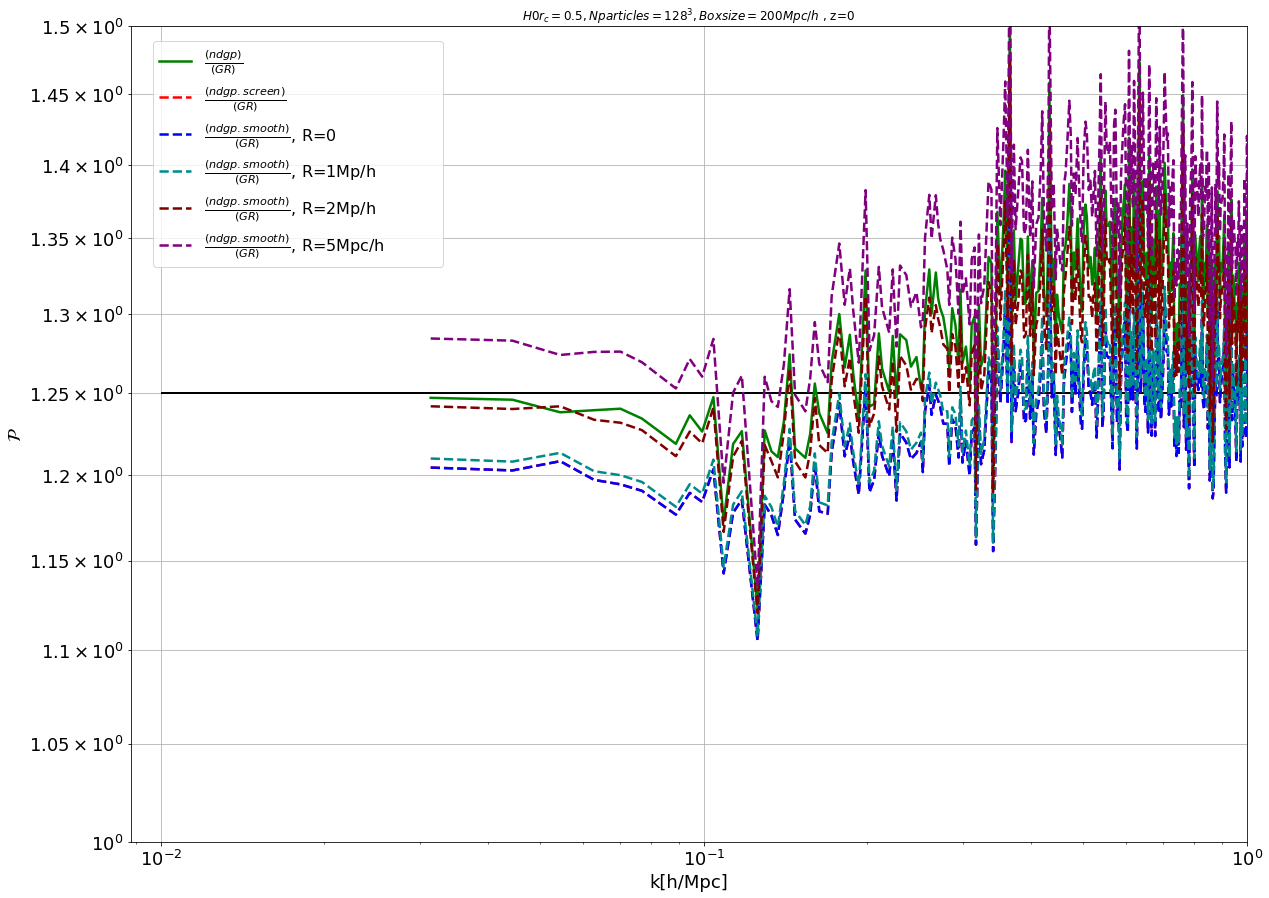

In [51]:
plt.figure(figsize=(20,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
string=r"$ H0r_c=0.5, Nparticles=128^3, Boxsize=200Mpc/h$";

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (6,7):
    plt.loglog(pow_ndgp_delta_z_all[i][:,0], (pow_ndgp_delta_z_all[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='solid',lw=2.5,label=r"$\frac{(ndgp)}{(GR)}$" )
    plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], (pow_ndgp_screen_delta_z_all[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-6],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp.screen)}{(GR)}$" )
    plt.loglog(pow_ndgp_smooth_delta_z_all_r0[i][:,0], (pow_ndgp_smooth_delta_z_all_r0[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-5],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp.smooth)}{(GR)}$, R=0" )
    plt.loglog(pow_ndgp_smooth_delta_z_all_r1[i][:,0], (pow_ndgp_smooth_delta_z_all_r1[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-2],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp.smooth)}{(GR)}$, R=1Mp/h" )
    plt.loglog(pow_ndgp_smooth_delta_z_all_r2[i][:,0], (pow_ndgp_smooth_delta_z_all_r2[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-0],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp.smooth)}{(GR)}$, R=2Mp/h" )

    plt.loglog(pow_ndgp_smooth_delta_z_all_r5[i][:,0], (pow_ndgp_smooth_delta_z_all_r5[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-3],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp.smooth)}{(GR)}$, R=5Mpc/h" )


    ax.hlines(y=1.25, xmin=0.01, xmax=20, linewidth=2, color='black')
#     ax.hlines(y=1.15, xmin=0.01, xmax=20, linewidth=2, color='black')


plt.legend(bbox_to_anchor=(0.02, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)
plt.title(string+" "+", z="+str(z_list[i]))
plt.yticks(np.arange(1.0,1.7,0.05))
# ax.hlines(y=1.03, xmin=0.01, xmax=20, linewidth=2, color='black')
# ax.hlines(y=1.15, xmin=0.01, xmax=20, linewidth=2, color='black')
plt.xlim(0.0088,1.)
plt.ylim(1.0,1.5)
# plt.grid(True)

# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()

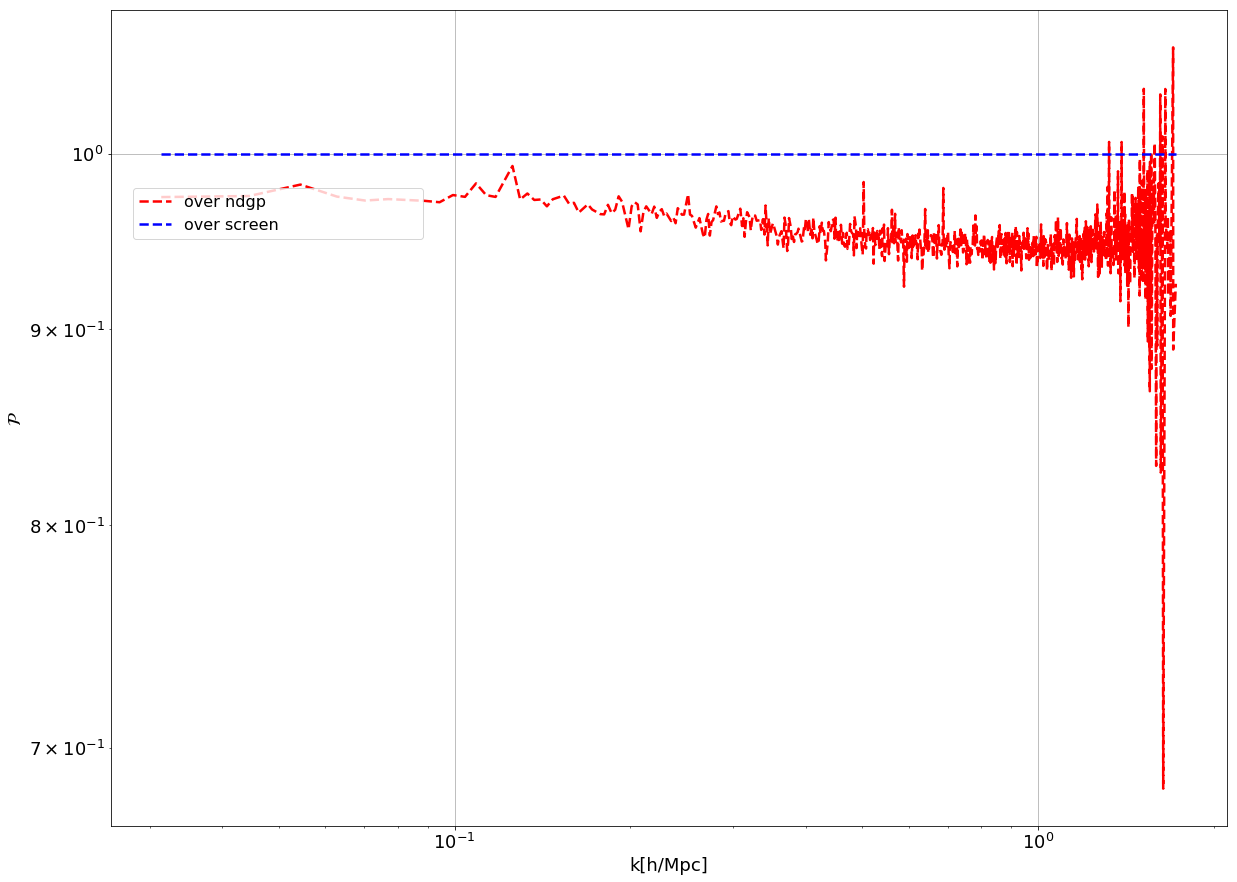

In [5]:
plt.figure(figsize=(20,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (6,7):
#     plt.loglog(pow_ndgp_delta_z_all[i][:,0], (pow_ndgp_delta_z_all[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='solid',lw=2.5,label=r"$\frac{(ndgp)}{(GR)}$, H0r_c=0.5, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], (pow_ndgp_screen_delta_z_all[i][:,1])/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='dashed',lw=2.5,label=r"$\frac{(ndgp-screen)}{(GR)}$, H0r_c=0.5, z= "+str(z_list[i]) )
    plt.loglog(pow_ndgp_smooth_delta_z_all_r0[i][:,0], (pow_ndgp_smooth_delta_z_all_r0[i][:,1])/(pow_ndgp_delta_z_all[i][:,1]),color="red",linestyle='dashed',lw=2.5,label=r"over ndgp" )
    plt.loglog(pow_ndgp_smooth_delta_z_all_r0[i][:,0], (pow_ndgp_smooth_delta_z_all_r0[i][:,1])/(pow_ndgp_screen_delta_z_all[i][:,1]),color="blue",linestyle='dashed',lw=2.5,label=r"over screen" )
#     plt.loglog(pow_ndgp_smooth_delta_z_all[i][:,0], (pow_ndgp_smooth_delta_z_all[i][:,1])/(pow_GR_delta_z_all[i][:,1]),color="blue",linestyle='dashed',lw=2.5,label=r"over GR" )

    #     plt.loglog(pow_ndgp_delta_z_all[i][:,0], (pow_ndgp_delta_z_all[i][:,1]),color=ColorsI[i-3],linestyle='dashed',lw=2.5,label=r"ndgp" )
#     plt.loglog(pow_GR_delta_z_all[i][:,0], (pow_ndgp_screen_delta_z_all[i][:,1]),color="r",linestyle='dashed',lw=2.5,label=r"lcdm" )

plt.legend(bbox_to_anchor=(0.02, 0.68, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)
# plt.ylim(1.0,2.0)
plt.grid(True)

plt.show()

In [46]:
plt.figure(figsize=(20,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (6,7):
    plt.semilogx(pow_ndgp05_delta_z_all[i][:,0],pow_ndgp05_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='-',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)}$, H0r_c=0.5, z= "+str(z_list[i]) )
    plt.semilogx(pow_ndgp05_screen_delta_z_all[i][:,0], pow_ndgp05_screen_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-2],linestyle='--',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)}$, H0r_c=0.5, z= "+str(z_list[i]) )
ax.hlines(y=1.25, xmin=0.01, xmax=20, linewidth=2, color='black')
# ax.hlines(y=1.15, xmin=0.01, xmax=20, linewidth=2, color='black')


plt.legend(bbox_to_anchor=(0.02, 0.78, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)


# ##Subplot 2
# plt.subplot(212)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (1,5):
#     plt.loglog(pow_gr_delta_zall[i][:,0], np.abs(pow_ndgp_delta_zall[i][:,1]-pow_gr_delta_zall[i+2][:,1])/pow_gr_delta_zall[i][:,1],color=tableau_color[i],linestyle='dashed',lw=2.5, label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp) - \mathcal{P}_{\delta_m}(GR)}{\mathcal{P}_{\delta_m} (GR)}$,  z="+str(z_list[i]) )
#     plt.axvspan(0.6, 14, alpha=0.5, color='pink')


# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# # plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,0.7)
plt.ylim(1.0,1.5)
plt.grid(True)

# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()

NameError: name 'pow_ndgp05_delta_z_all' is not defined

In [38]:
plt.figure(figsize=(18,10))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (2,7):
    plt.semilogx(pow_ndgp_screen_delta_z_all[i][:,0],( pow_ndgp_screen_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1]) -(pow_ndgp_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1]) ,color=ColorsI[i-4],linestyle='dashed',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)} -\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)} $, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_delta_z_all[i][:,0], pow_ndgp_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )


plt.legend(bbox_to_anchor=(0.02, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)


# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()

IndexError: list index out of range

#### Phi power spectrum Plots

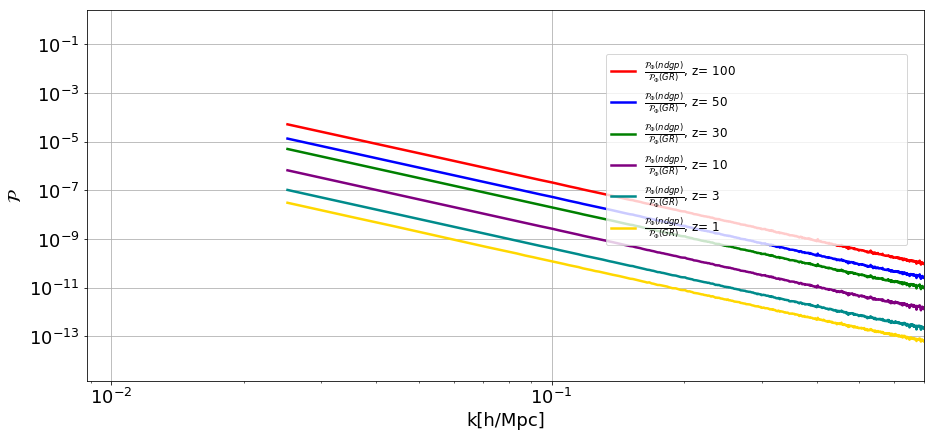

In [18]:
plt.figure(figsize=(15,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
x = np.linspace(0, 10, 1000)

plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (0,maxNum-1):
#     plt.loglog(pow_gr_phi_zall[i][:,0], pow_gr_phi_zall[i][:,1],color=tableau20[i],linestyle='dashed',lw=2.5, label=r"$\Phi$(ndgp),  z="+str(z_list[i]) )
    plt.loglog(pow_ndgp_phi_z_all[i][:,0], pow_ndgp_screen_phi_z_all[i][:,1]/pow_GR_screen_delta_z_all[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\Phi}(ndgp)}{\mathcal{P}_{\Phi}(GR)}$, z= "+str(z_list[i]) )
    plt.axvspan(0., 14, alpha=0.5, color='pink')

# plt.loglog(power_gr_phi_zall[i+1][:,0], power_gr_phi_zall[i+1][:,1],color="red",linestyle='dashed',lw=2.5, label=r"$\Phi$(ndgp),  z="+str(z_list[i+1]) )
# plt.loglog(pow_ndgp_phi_zall[i+1][:,0], pow_ndgp_phi_zall[i+1][:,1],color="purple",linestyle='solid',lw=2.5,label=r"$\Phi$(GR), z= "+str(z_list[i+1]) )

plt.legend(bbox_to_anchor=(0.62, 0.78, 0.36, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
plt.xlim(0.0088,0.7)
plt.ylim(0.,2.5)
plt.grid(True)


# ##Subplot 2
# plt.subplot(212)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (2,5):
#     plt.loglog(pow_gr_phi_zall[i][:,0], np.abs(pow_ndgp_phi_zall[i][:,1]-pow_gr_phi_zall[i+2][:,1])/pow_gr_phi_zall[i][:,1],color=tableau_color[i],linestyle='dashed',lw=2.5, label=r"$|\frac{\mathcal{P}_{\Phi}(ndgp) - \mathcal{P}_{\Phi} (GR)}{\mathcal{P}_{\Phi}(GR)}|$,  z="+str(z_list[i]) )
#     plt.axvspan(0.6, 14, alpha=0.5, color='pink')



# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# # plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,0.7)
# # plt.ylim(1.e-15,1.e-9)
# plt.grid(True)


# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()